In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import multiprocessing
from item.item_list import (
    ItemList,
    Item
)
from nlp.utils import (
    plot_histogram,
    get_completetext,
    plot_wordcloud,
    print_statistics,
    groups_frequency_sort)
from nlp.grouping import (
    get_groups,
    get_groups_size,
    get_unigram_groups,
    get_two_tokens_groups,
    get_first_token_groups,
    get_bigram_groups,
    get_first_two_groups,
    groups_frequency_sort
)
from nlp.pos_tagging import (
    get_tokens_tags
)
from nlp.word_embeddings import (
    load_word_embeddings,
    get_item_embedding,
    get_items_embeddings,
    get_items_similarities
)

In [2]:
#It loads the items from the list:
itemlist = ItemList()
itemlist.load_items_from_file('../dados/items_preprocessed_sp0_sc1.zip', original=True)

In [3]:
words = itemlist.items_list

In [4]:
len(words)

1489804

In [5]:
first_token_groups = itemlist.get_first_token_groups()
group_len = len(first_token_groups)

In [6]:
group_len

13806

In [7]:
keys_ft = first_token_groups.keys()
values_ft = list(first_token_groups.values())
count = 0
i = 0

while(i<len(values_ft)):
    count = count + len(values_ft[i])
    i = i + 1
print(count)

1488531


In [4]:
file = 'results/BOW/15_hdbscan_baseline_bow_l2_umap_tokens_med_nouns.pkl'
a_file = open(file, "rb")
output = pickle.load(a_file)

In [9]:
len(output)
count = 0
for k in output:
    count = count + len(output[k])
print(count)

1507674


In [4]:
count = 0
total = 0
for key in output:
    total += len(output[key])
    if(key.endswith('_-1')):
        count += len(output[key])
print(count)
print(total)
print((count/total*100))

138640
1507674
9.19562186520428


In [86]:
group_size = {}
groups_sizes_list = []

for group, items in output.items():
    group_size[group] = len(items)
    groups_sizes_list.append(len(items))

In [87]:
groups_sizes_list.count(1)

6339

In [88]:
groups_sizes_list.count(1)/len(output) * 100

19.683890199975156

In [89]:
groups_names_size = groups_frequency_sort(group_size)

In [90]:
groups_names_size[28434
                  :48434]

[('anestecico', 1),
 ('bar', 1),
 ('mochobase', 1),
 ('zg', 1),
 ('trophi', 1),
 ('maleto', 1),
 ('macromodetos', 1),
 ('ooculos', 1),
 ('micho', 1),
 ('atendiemnto', 1),
 ('estrardiol', 1),
 ('catet', 1),
 ('debodol', 1),
 ('marmiteiro', 1),
 ('abdonem', 1),
 ('ginkibiloba', 1),
 ('notific', 1),
 ('nitaxozanida', 1),
 ('antibiogramacultcont', 1),
 ('pivalato', 1),
 ('tarifa', 1),
 ('he', 1),
 ('olopatapina', 1),
 ('azitioprina', 1),
 ('phmb', 1),
 ('fixacal', 1),
 ('colangio', 1),
 ('ncomicina', 1),
 ('serigrafar', 1),
 ('corene', 1),
 ('cruzta', 1),
 ('masso', 1),
 ('gilcazida', 1),
 ('alugeul', 1),
 ('cloridrat', 1),
 ('venaflan', 1),
 ('zzze', 1),
 ('kld', 1),
 ('adaptadador', 1),
 ('plicometro', 1),
 ('vedadores', 1),
 ('dipospram', 1),
 ('sesi', 1),
 ('samantilha', 1),
 ('kilograma', 1),
 ('bemmax', 1),
 ('swaab', 1),
 ('icd', 1),
 ('hemogenizador', 1),
 ('oxitetricina', 1),
 ('mangotes', 1),
 ('recobrimento', 1),
 ('citalopram20', 1),
 ('ddavp', 1),
 ('condesadores', 1),
 ('desi

In [91]:
items_group_size = []

for group_size in groups_sizes_list:
    for i in range(group_size):
        items_group_size.append(group_size)

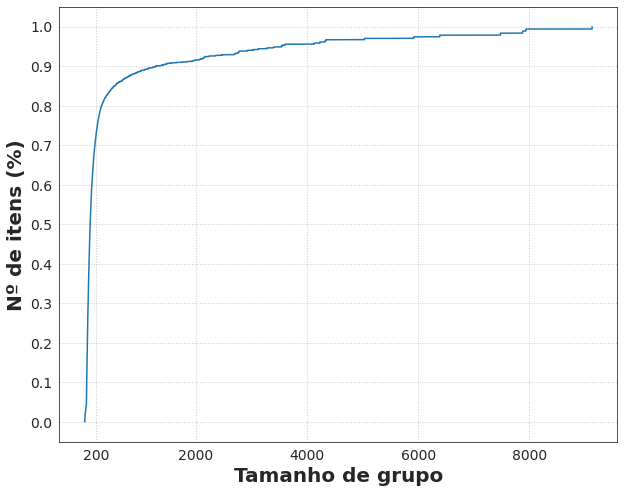

<Figure size 432x288 with 0 Axes>

In [92]:
from statsmodels.distributions.empirical_distribution import ECDF

# fit a cdf
ecdf = ECDF(items_group_size)

fig, (axis1) = plt.subplots(figsize=(10,8))
x_label = 'Tamanho de grupo'
y_label = 'Nº de itens (%)'


# kwargs = {'cumulative': True}
# sns.distplot(vlr_recurso, hist_kws=kwargs, kde_kws=kwargs)
plt.plot(ecdf.x, ecdf.y)

axis1.set_xticks([200, 2000, 4000, 6000, 8000])
axis1.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')

plt.grid(axis='both', linestyle=':', linewidth=1.0)
# axis1.legend(loc='upper right')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()
plt.clf()

In [93]:
print_statistics(groups_sizes_list)

Mean: 46.81635821637064
First quartile: 2.0
Median: 30.0
Third quartile: 56.0
Std: 156.12563792103228
Var: 24375.214816249274
Max: 9131
Min: 1.0


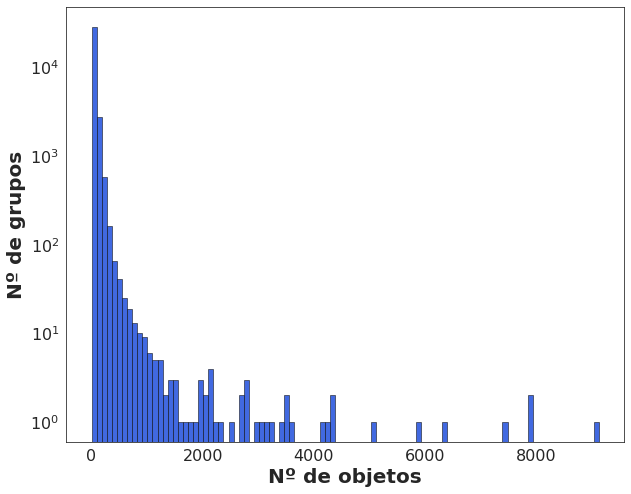

<Figure size 432x288 with 0 Axes>

In [94]:
plot_histogram(groups_sizes_list, 100, 'Nº de objetos', 'Nº de grupos', log=True)

In [95]:
count_interval = {}
count_interval['1'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,2000]'] = 0
count_interval['(2000,4000]'] = 0
count_interval['(4000,6000]'] = 0
count_interval['>6000'] = 0

In [96]:
for p in groups_sizes_list:

    if p == 1:
        count_interval['1'] += 1
    elif p > 1 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5 and p <= 10:
        count_interval['(5,10]'] += 1
    elif p > 10 and p <= 100:
        count_interval['(10,100]'] += 1
    elif p > 100 and p <= 1000:
        count_interval['(100,1000]'] += 1
    elif p > 1000 and p <= 2000:
        count_interval['(1000,2000]'] += 1
    elif p > 2000 and p <= 4000:
        count_interval['(2000,4000]'] += 1
    elif p > 4000 and p <= 6000:
        count_interval['(4000,6000]'] += 1
    else:
        count_interval['>6000'] += 1

In [97]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value)
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

1 : 6339
(1,5] : 6070
(5,10] : 1553
(10,100] : 15063
(100,1000] : 3115
(1000,2000] : 31
(2000,4000] : 22
(4000,6000] : 6
>6000 : 5


In [72]:
intervals_df = pd.DataFrame(lines, columns=["size"])
intervals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46403 entries, 0 to 46402
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   size    46403 non-null  object
dtypes: object(1)
memory usage: 362.6+ KB


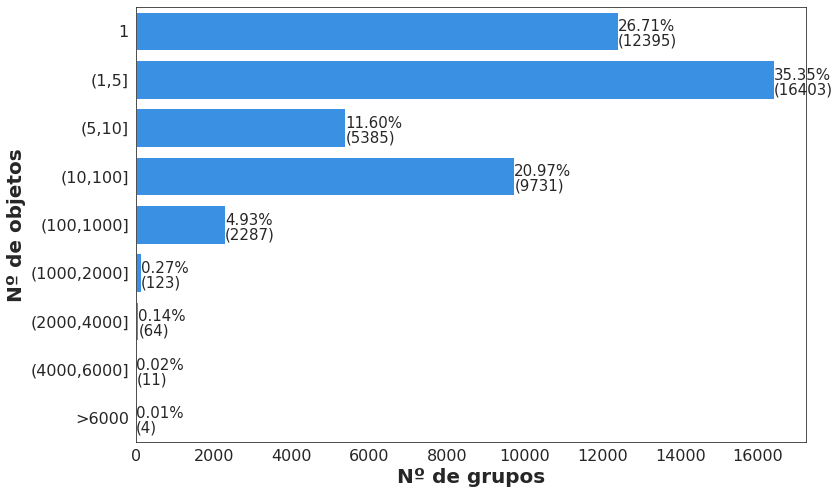

<Figure size 432x288 with 0 Axes>

In [73]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="size", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de grupos", fontsize=20, weight='bold')
axis1.set_ylabel("Nº de objetos", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()

In [74]:
groups_names_size[:10]

[('papel_0', 26240),
 ('pneu_90', 8916),
 ('camara_0', 7057),
 ('porta_0', 6441),
 ('cola_0', 5956),
 ('mesa_0', 5655),
 ('bloco_0', 5349),
 ('kit_17', 5017),
 ('broca_10', 4967),
 ('mascara_0', 4927)]

In [75]:
groups_papel = {}

for group, items in output.items():
    first_token = group.split('_')
    if first_token[0] == 'seringa':
        groups_papel[group] = items

In [76]:
len(groups_papel)

268

In [77]:
for group, items in groups_papel.items():
    print('*********************')
    print(group)
    print(len(items))
    sample = random.sample(items, min(10, len(items)))
    #for id_ in sample:
    #    print(itemlist.items_list[id_])

*********************
seringa_0
9
*********************
seringa_1
1099
*********************
seringa_2
11
*********************
seringa_3
3
*********************
seringa_4
2
*********************
seringa_5
4
*********************
seringa_6
4
*********************
seringa_7
1
*********************
seringa_8
1
*********************
seringa_9
3
*********************
seringa_10
4
*********************
seringa_11
14
*********************
seringa_12
4
*********************
seringa_13
12
*********************
seringa_14
2
*********************
seringa_15
85
*********************
seringa_16
1
*********************
seringa_17
1
*********************
seringa_18
148
*********************
seringa_19
3
*********************
seringa_20
2
*********************
seringa_21
2
*********************
seringa_22
1
*********************
seringa_23
2
*********************
seringa_24
1
*********************
seringa_25
4
*********************
seringa_26
8
*********************
seringa_27
1
*********************

In [78]:
output

{'iodosrb': [495420],
 'prendedor_0': [12545,
  15573,
  18467,
  20127,
  30391,
  32142,
  36094,
  38137,
  38550,
  43424,
  50500,
  50586,
  51651,
  52530,
  56257,
  56633,
  60623,
  62149,
  64653,
  71730,
  74990,
  77359,
  81788,
  93638,
  97379,
  97642,
  99347,
  101355,
  103310,
  104148,
  108946,
  112717,
  115117,
  115665,
  122140,
  122626,
  123262,
  127523,
  135028,
  135313,
  144073,
  144836,
  147005,
  148449,
  152704,
  154673,
  161069,
  162797,
  162948,
  163609,
  164558,
  164809,
  165281,
  168466,
  178141,
  179756,
  180920,
  181799,
  183056,
  184227,
  185351,
  185828,
  192211,
  194027,
  194147,
  195890,
  195926,
  196440,
  199561,
  200784,
  206689,
  209958,
  211683,
  220449,
  231489,
  231712,
  234076,
  236119,
  238056,
  238913,
  245090,
  245514,
  247195,
  247461,
  249388,
  251965,
  253637,
  258578,
  269524,
  269957,
  270752,
  275891,
  276042,
  276447,
  281477,
  284278,
  286225,
  288196,
  290769,


In [79]:
#  word embeddings file, each line contains an embedding
word_embeddings_file = '../../../embeddings/cbow_s50.txt'

In [80]:
# read word embeddings from file and store them in a map
word_embeddings = load_word_embeddings(word_embeddings_file)

FileNotFoundError: [Errno 2] No such file or directory: '../../../embeddings/cbow_s50.txt'

In [81]:
# Get the tags of tokens descriptions
word_class = get_tokens_tags()

In [82]:
# Build the vector representation for an item using the word embeddings
item_embedding = get_items_embeddings(itemlist.items_list, word_embeddings, word_class, embedding_type=['N', 'MED'], type='dict')

NameError: name 'word_embeddings' is not defined

In [ ]:
del itemlist
del word_class
del word_embeddings

In [ ]:
def get_ranges(group_len, n_threads):
    total_len = group_len
    num_threads = n_threads
    lower = []
    upper = []
    step = int(total_len/num_threads)

    for k in range(num_threads):
        lower.append(0)
        upper.append(0)

    lower[0] = 0
    upper[0] = step

    i = 1
    j = 0
    while (i < num_threads):
        upper[i]  = upper[j] + step
        lower[i]  = upper[j] +  1
        if(i%2 != 0):
            upper[i] = upper[i] + 1

        i = i + 1
        j = j + 1

    upper[n_threads - 1] = upper[n_threads - 1] - 6
    return lower, upper


In [ ]:
def get_intra_clusters_similarities(item_embedding, groups, it_thread, lower,
                                    upper, Result):

    print(it_thread)

    # It creates a list of the the keys of these groups:
    group_name = list(groups.keys())
    # It gets the values of each group (i.e., the ids of the descriptions into that group):
    group_descriptions = list(groups.values())

    # Iterator of the first token groups:
    ft_it = lower
    
    intra_cluster_similarity = {}
    
    while ft_it <= upper:

        if len(group_descriptions[ft_it]) == 1:
            intra_cluster_similarity[group_name[ft_it]] = {'mean': 1.0, 'min': 1.0} 
        else:
            similarities = get_items_similarities(group_descriptions[ft_it], item_embedding)
            similarity_values = []
            for item, similarity_list in similarities.items():
                for s in similarity_list:
                    similarity_values.append(s[1])
                    
            similarity_values = [x for x in similarity_values if math.isnan(x) == False]
            if len(similarity_values) > 1:
                intra_cluster_similarity[group_name[ft_it]] = {'mean': np.mean(similarity_values), 'min': np.min(similarity_values)}
#                 intra_cluster_similarity[group_name[ft_it]] = np.mean(similarity_values)
            else:
                intra_cluster_similarity[group_name[ft_it]] = {'mean': 0.0, 'min': 0.0}
                
        ft_it = ft_it + 1

    Result[it_thread] = intra_cluster_similarity

In [ ]:
group_len = len(output)
groups_new = {}
keys_ft = list(output.keys())
random.shuffle(keys_ft)
random.shuffle(keys_ft)

for k in keys_ft:
    groups_new[k] = output[k]

In [ ]:
manager = multiprocessing.Manager()
return_dict = manager.dict()
jobs = []
n_threads = 19

In [ ]:
# It defines the ranges (of the groups) the threads will work on:
thread_ranges = get_ranges(group_len, n_threads)
print('Read ranges')
print(thread_ranges)

In [ ]:
for i in range(n_threads):
    p = multiprocessing.Process(target=get_intra_clusters_similarities,
    args = (item_embedding, groups_new, i, thread_ranges[0][i], thread_ranges[1][i], \
            return_dict))
    jobs.append(p)
    p.start()

In [ ]:
for proc in jobs:
    proc.join()

In [ ]:
dictionary_clusters = {}
for i in range(n_threads):
    dictionary_clusters.update(return_dict[i])

In [ ]:
a_file = open("./results/baseline+embeddings/intra_similarity_50_SUB+MED_xmeans.pkl", "wb")
pickle.dump(dictionary_clusters, a_file)
a_file.close()

In [ ]:
dictionary_clusters

In [11]:
# Build the vector representation for an item using the word embeddings
items_embeddings = get_items_embeddings(itemlist.items_list, word_embeddings, word_class, embedding_type=['N', 'MED'], type='list')

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE

items_embeddings_embedded = TSNE(n_components=2, n_jobs=8).fit_transform(np.array(items_embeddings))

In [ ]:
labels = []
points = []

label = 0
for group, items in output.items():
    for item in items:
        points.append(items_embeddings_embedded[item])
        labels.append(label)
    label += 1